# Weather Prediction by Numerical Python
> Numerical Weather Prediction from scratch.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

### Intro

In 1922 Lewis Fry Richardson published a book that for the first time described how the dynamical processes in the atmosphere could be described with differential equations and solved using numerical methods. At that time computers did not exist and all the calculations had to be solved by hand. Nowadays, some of the largest computers in the world are dedicated to solve these same equations at speeds that Richardson could never have imagined.

This tutorial offers an introduction to numerical simulation using Richardson's book to ilustrate the fundamentals of weather forecasting and Python, to learn how these equations can be implemented and solved from scratch using simple standard libraries.

> youtube: https://youtu.be/rhLV8emuHXk

### Barotropic model

Modeling the dynamics of the atmosphere is a complex subject. Scientist often use simplifications or assumptions to simplify and describe the atmospheric processes in a simpler and more manageable way. In a barotropic model, the assumption is that air density depends only on pressure, ignoring all other effects such as temperature or humidity. Barotropic models are conceptually simple and are easy to implement. Richardson, chose this model to perform the first numerical weather forecast at the beginning of the XXth century. The amount of time he spent to perform all the calculations required to generate a 12 hours weather forecast for Europe is unkown but the whole process span a few years. In this tutorial we are going to reproduce these calculations and condense this model to a few lines of Python code that can be run in less than a second.

Barotropic models use pressure as their only input. Differences in pressure between two points in space tend to compensate creating a flux of air that travels to fill the deficits in pressure balancing this field. The initial pressure situation chosen by Richardson to demostrate a barotropic model was a zonal wavenumber one perturbation given by:

$$p_s=10^4 sin^2\phi\:cos\phi\:sin\lambda$$

Zonal wavenumber is a form of characterising pressure changes across the earth using sinusoidal functions. In this case, zonal wavenumber one, means that there is only one sinusoidal oscilation spanning the globe along longitudes. One in the northern and another one in the southern hemisphere.

This equation represents the change in the surface pressure field as a function of the latitude $\phi$ and longitude $\lambda$

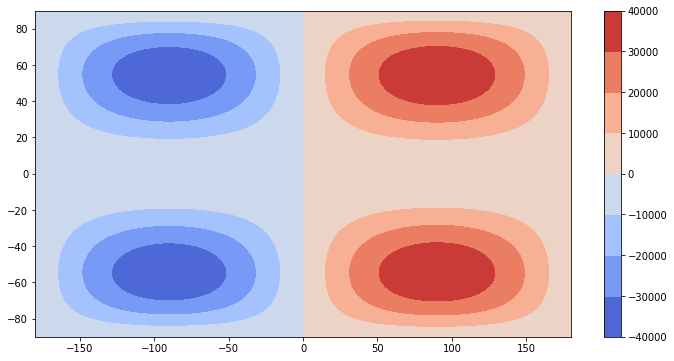

In [9]:
%matplotlib inline

from IPython.display import Markdown as md
import numpy as np
from matplotlib import pyplot as plt

ϕ = np.linspace(90,-90,181)
λ = np.linspace(-180,180,361)

λλ, ϕϕ = np.meshgrid(np.radians(λ),np.radians(ϕ))

ps = 10e4*(np.sin(ϕϕ)**2)*np.cos(ϕϕ)*np.sin(λλ)

plt.figure(figsize=(12,6))
plt.contourf(λ,ϕ,ps, cmap='coolwarm')
plt.colorbar()

### Plotting a weather map

The previous figure shows two low pressure systems on the left and two high pressure systems on the right. Unfortunately, it is hard to see the correspondance of this example with the real world, so we are going to overlay a map to give more context and help ilustrating this example.

We use the Cartopy Python module to superimpose the coastlines on top of the previous figure and we are also representing the isobars, so it looks like a real weather map.

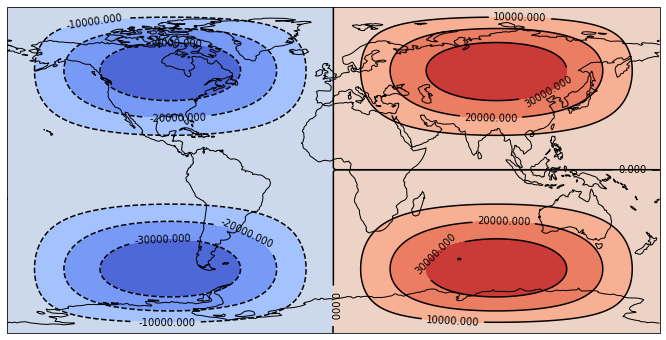

In [22]:
import cartopy.crs as ccrs

plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
cs = ax.contour(λ,ϕ,ps, colors=['black'])
ax.clabel(cs, inline=True, fontsize=10)
ax.contourf(λ,ϕ,ps, cmap='coolwarm')

plt.show()

Now we can clearly see where are the pressure systems in our system and also the isobars or lines connecting points with equal values of pressure.

However, we know the atmosphere is not static. In the absence of any external force, this system would quickly evolve to compensate the differences in pressure. Air would move from the right side of the figure to the left, creating a flow that crosses the center of the image and also wraps around the sides of the figure.

> Note: Both sides of the figure represent the same date line in the middle of the Pacific ocean and air can flow between them.

In order to understand how this system evolves, we need to derive the wind field corresponding to this pressure situation. From this pressure field we can calculate the gradient field and then derive wind as the flow crossing the gradient lines, although in the case of the Earth, this would be a poor reflection of reality. The Earth is nearly spherical and rotates around an axis which introduces coriolis forces that deviates the gradient flow from its natural perpendicular direction.

### Geostrophic wind

Geostrophic wind is another simplification used by scientist to derive wind from pressure taking into account the Coriolis force. We use $U_g$ to denote the zonal or horizontal component and $V_g$ to denote the meridional or vertical components of the geostrophic wind. This components can be calculated with the following formulas:

$$Ug=\frac{-1}{\rho f_c} \frac{\Delta P}{\Delta y}$$
$$Ug=\frac{1}{\rho f_c} \frac{\Delta P}{\Delta x}$$

In [ ]:
$$U=-10^4 \frac{h}{2\Omega a} (2sin^2\phi-cos^2\phi)\:sin\lambda$$
$$V=10^4 \frac{h}{2\Omega a} sin\phi\:cos\lambda$$

<IPython.core.display.Javascript object>


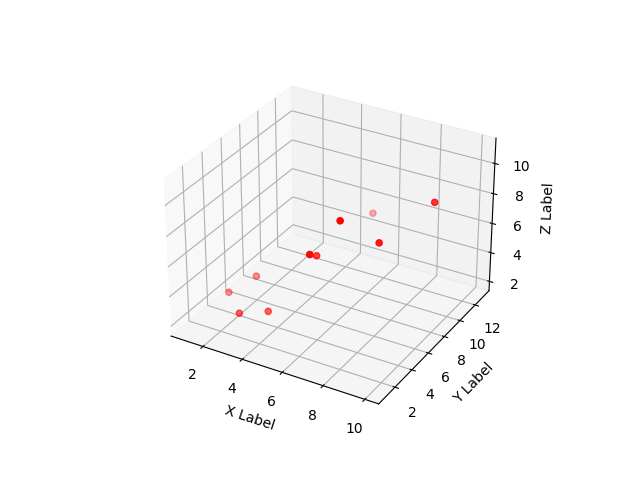

In [1]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>


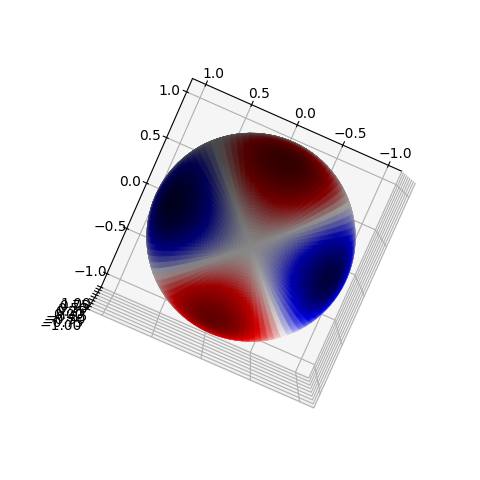

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 2, 3

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
#ax.set_axis_off()
plt.show()

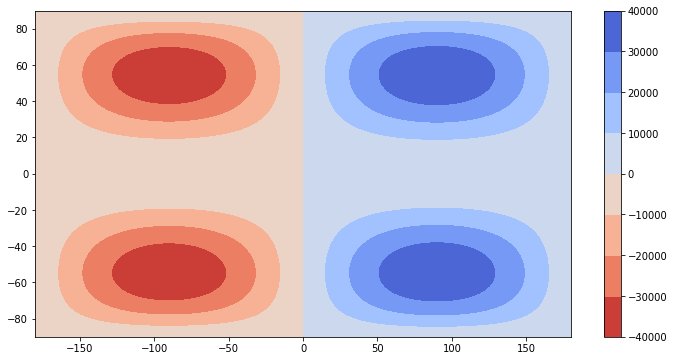

In [12]:
max_ϕi, max_λi = np.unravel_index(np.argmax(ps, axis=None), ps.shape)

md(f"This image represents two low pressure systems, centered on the western part of each hemisphere and two low pressure systems on the eastern half of the world. maxima of magnitude {ps.max()/1000:.1f} hPa at {λ[max_λi]} East and {ϕ[max_ϕi]} North and South, and corresponding minima in the western hemisphere at the antipodes of the maxima.")

This image represents two low pressure systems, centered on the western part of each hemisphere and two low pressure systems on the eastern half of the world. maxima of magnitude 38.5 hPa at 90.0 East and 55.0 North and South, and corresponding minima in the western hemisphere at the antipodes of the maxima.

-990917.9336159385


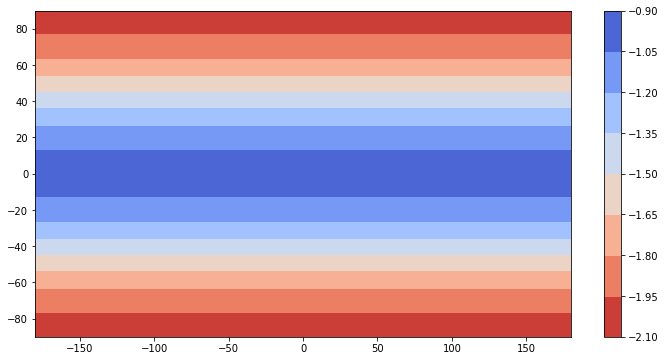

In [59]:
plt.figure(figsize=(12,6))
#plt.contourf(λ,ϕ,(2*np.square(np.sin(ϕϕ))-np.square(np.cos(ϕϕ)))*np.sin(λλ), cmap='coolwarm_r')
plt.contourf(λ,ϕ,-(2*(np.sin(ϕϕ)**2))-(np.cos(ϕϕ)**2), cmap='coolwarm_r')
plt.colorbar()
print(-10e4*(h/(Ω2*a)))

-1981835.867231877 90 (181, 361)


(0, 90)

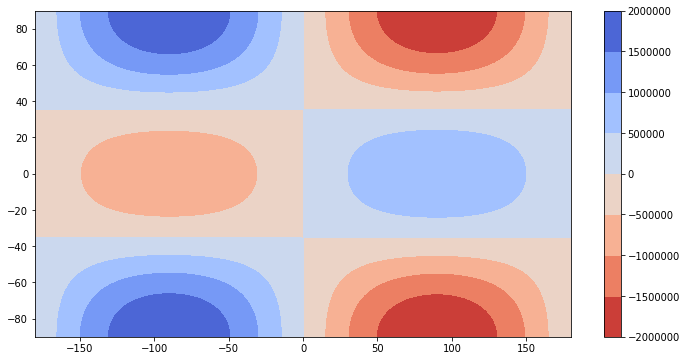

In [57]:
h = 9200

# Earth's angular velocity
Ω2 = 1.458423e-4

# Earth's radius
a = 6.366e6

U = -10e4*(h/(Ω2*a))*((2*np.square(np.sin(ϕϕ)))-np.square(np.cos(ϕϕ)))*np.sin(λλ)
#U = 2*np.square(np.sin(ϕϕ))-np.square(np.cos(ϕϕ))*np.sin(λλ)
plt.figure(figsize=(12,6))
plt.contourf(λ,ϕ,U, cmap='coolwarm_r')
plt.colorbar()

print(U.min(),U.argmax(), U.shape)
np.unravel_index(np.argmax(U, axis=None), U.shape)

To compute the tendency, we need the divergence on the black squares. For this, we require the zonal wind in the white squares to the east and west, and the meridional wind in the white squares to the north and south of each black square.

$$\frac{\partial P}{\partial t} + gh \nabla \cdot V = 0$$

$$\frac{\partial P}{\partial t} + \frac{gh}{a\:cos\phi} \left(\frac{\Delta U}{\Delta \lambda}+\frac{\Delta (V cos \phi)}{\Delta \phi}\right)=0$$

In [55]:
# Gravitational acceleration
g = 9.79

# Earth's angular velocity
Ω = 1.458423e-4/2

# Earth's radius
a = 6.366e6

λ0 = 0
ϕ0 = 50.4

Δλ = 5.625
Δϕ = 3.6

Δt = 2700 #3/4 hour

ϕ = np.radians(np.array([ϕ0+Δϕ/2, ϕ0, ϕ0-Δϕ/2]))
cosϕ = np.cos(ϕ)

#λ = np.radians(np.array([λ0-Δλ, λ0, λ0+Δλ]))

cosϕ[0]

0.6129070536529766

In [2]:
Ue = -1064.44
Uw = 1064.44

ΔU = Ue - Uw

ΔU/np.radians(Δλ)

-21684.593615966347

In [3]:
Vn = 78295.45
Vs = 74327.53

(Vn*cosϕ[0]-Vs*cosϕ[2])/np.radians(Δϕ)

-18554.98251712508

In [4]:
divV = (1/(a*cosϕ[1])) * (ΔU/np.radians(Δλ) + (Vn*cosϕ[0]-Vs*cosϕ[2])/np.radians(Δϕ))

divV

-0.009916498688737384

In [35]:
δp = -g*divV

Δp = δp*Δt/100
Δp # hPa

2.6212280983939524